# Mall Customers Clustering Analysis

In [1]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for data analysis
import dabl

**Reading the Dataset**

In [2]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

## Examining Data

In [3]:
# lets check the shape of the dataset
print("Shape of the dataset :", data.shape)

Shape of the dataset : (200, 5)


In [4]:
# lets check the head of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# lets check the tail of the data
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
# lets check sample of the data
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
173,174,Male,36,87,92
131,132,Male,39,71,75
188,189,Female,41,103,17


## Descriptive Statistics

In [7]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# describing the categorical data
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
# checking if there is any NULL data
data.isnull().any().any()

False

## Clustering Analysis

### Which of the characteristics of the customer should be chosen for creating clusters?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

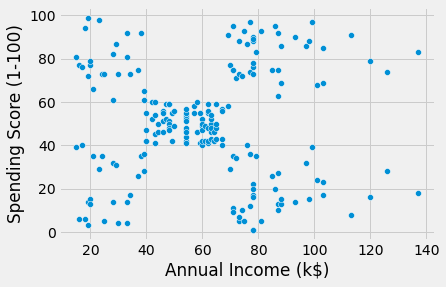

In [10]:
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'])

" Never trust your gut or instincts, they can be wrong also " - Daniel Kahneman

In [11]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [12]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

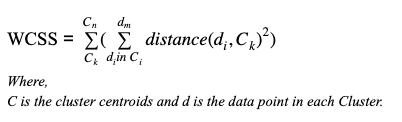

Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.

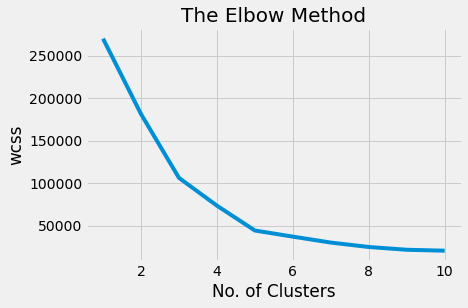

In [13]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Visualizaing the Clusters**

In [14]:
print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30259.657207285458, 25095.703209997544, 21830.04197804944, 20736.67993892413]


In [15]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

print(y_means)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


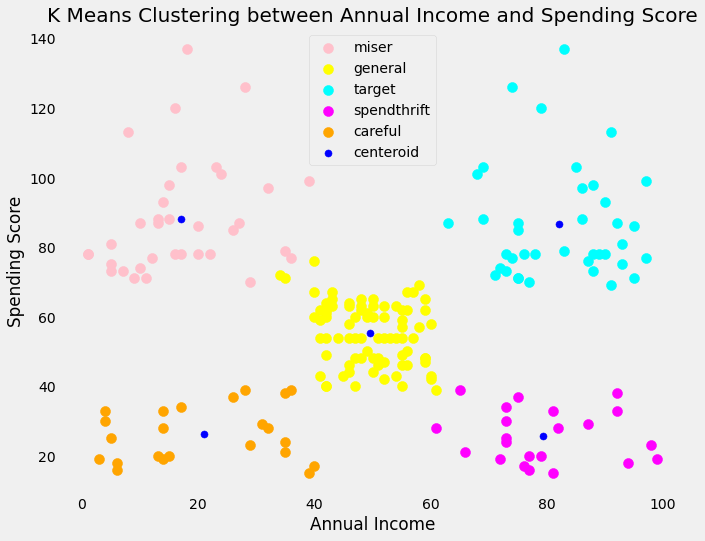

In [16]:
# lets visualize these clusters
plt.rcParams['figure.figsize']= (10,8)
plt.style.use('fivethirtyeight')


plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Clustering between Age and Spending Score

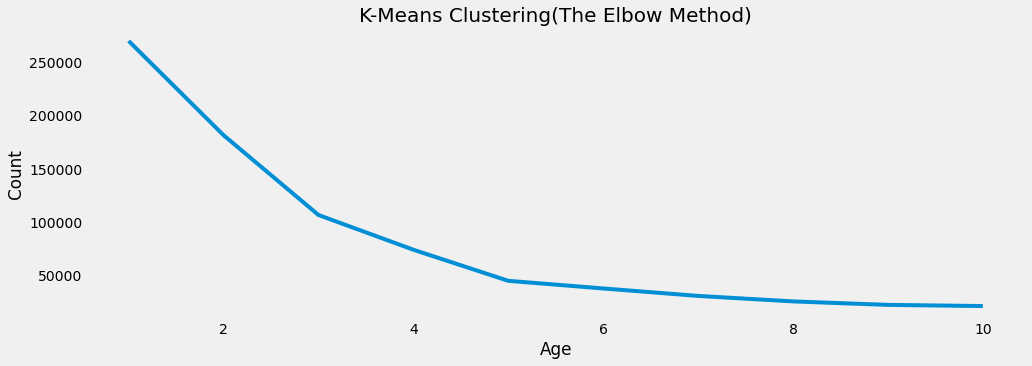

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

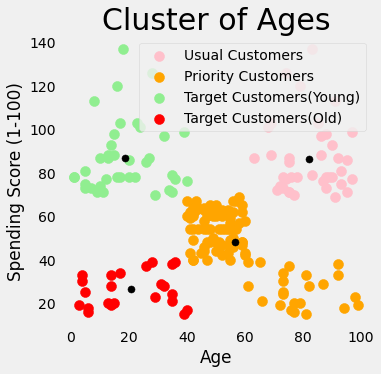

In [18]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (5, 5)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

## Silhouette Analysis

In [19]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [20]:
from sklearn.metrics import silhouette_score

score= silhouette_score(x, km.labels_, metric= 'euclidean')

print('Silhouette Score: %.3f' %score)

Silhouette Score: 0.554


#### Silhouette method helps us to visualize the score for each number of clusters.

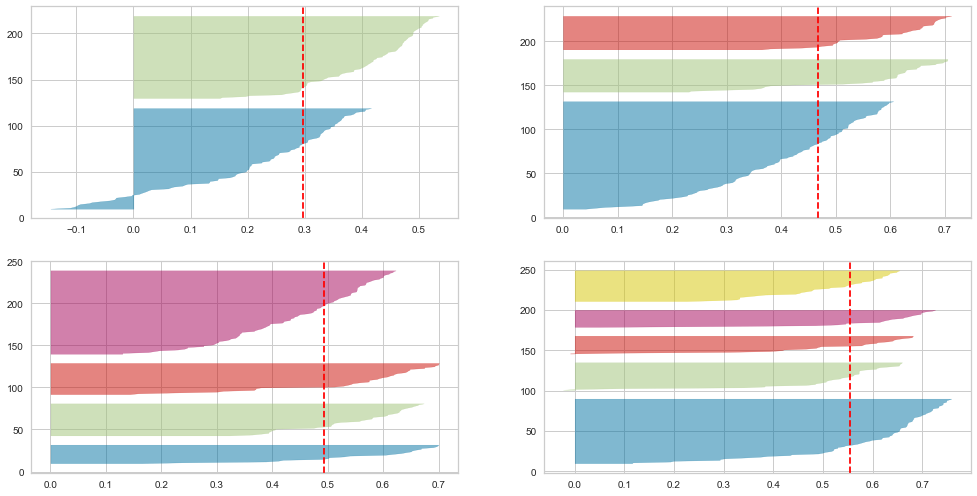

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax= plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    km= KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42, max_iter=100)
    q,mod= divmod(i,2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer= SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

## Clustering Multiple Dimensions

Q: Can We perform clustering analysis on more than two features at the same time ?

A: We can Cluster any number of Features at the same time. But we cann't visualize the Clusters

In [22]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
a= data.loc[:,['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

a.shape

(200, 3)

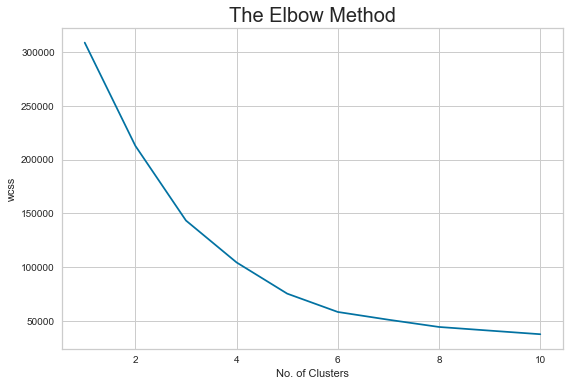

In [24]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    km= KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state=0)
    km.fit(a)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [25]:
km= KMeans(n_clusters=6, init='k-means++', max_iter= 300, n_init= 10, random_state=0)

y_means= km.fit_predict(a)

In [26]:
y_means= pd.DataFrame(y_means)
y_means

,0
0,5
1,4
2,5
3,4
4,5
...,...
195,3
196,2
197,3
198,2


In [27]:
df= pd.concat([data, y_means], axis=1)
df= df.rename(columns= {0:"Clusters"})
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5
5,6,Female,22,17,76,4
6,7,Female,35,18,6,5
7,8,Female,23,18,94,4
8,9,Male,64,19,3,5
9,10,Female,30,19,72,4


In [28]:
print("Customer IDs for Cluster 1: ", df[df['Clusters']==2]['CustomerID'].values)

Customer IDs for Cluster 1:  [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


## Hierarchical Clustering

In [29]:
x= data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

x.shape

(200, 2)

### Dendrograms

1. A dendrogram is a diagram that shows the hierarchical relationship between objects.
2. It is most commonly created as an output from hierarchical clustering.
3. The main use of a dendogram is to work out the best way to allocate objects to clusters.


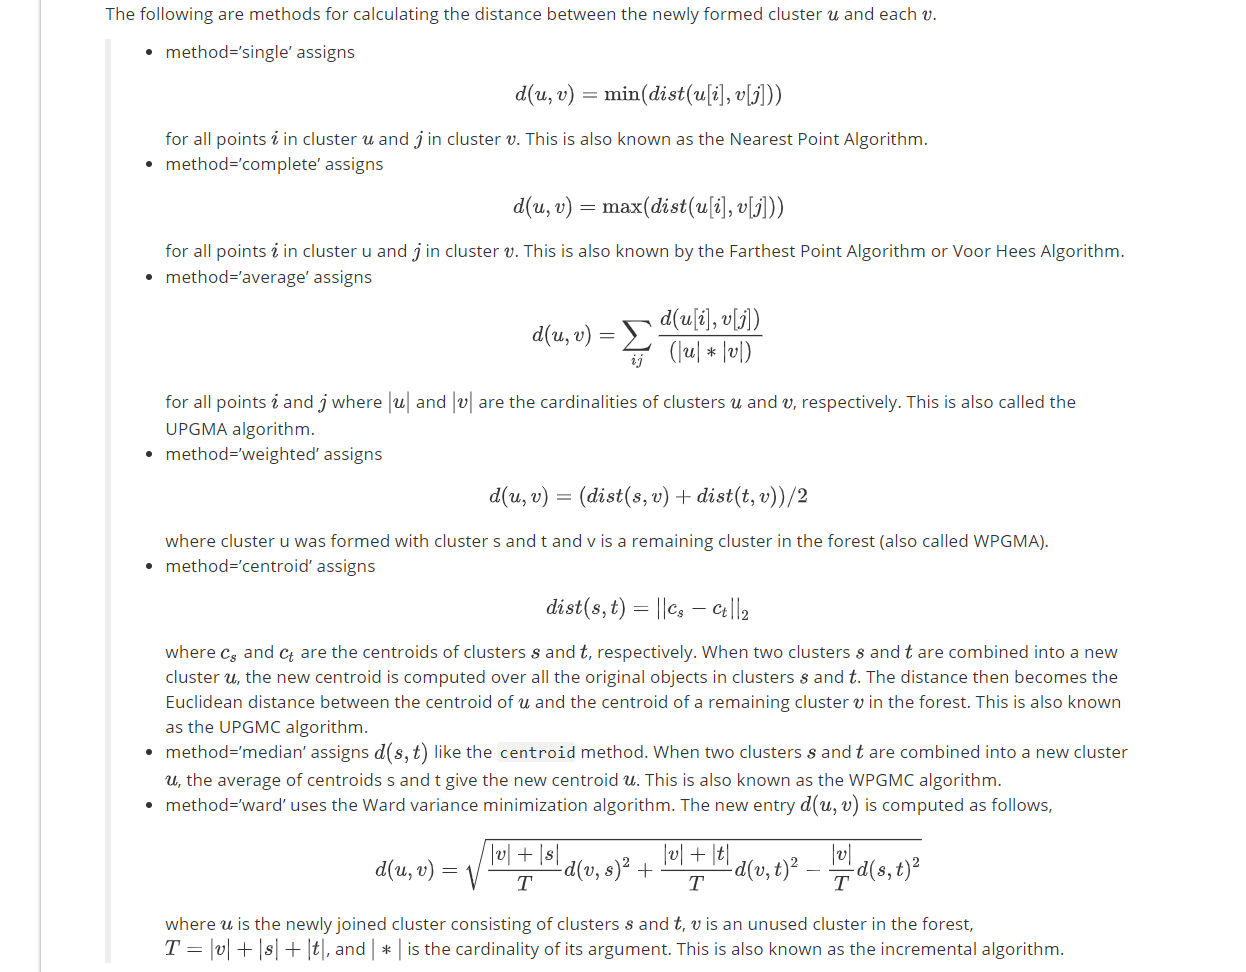

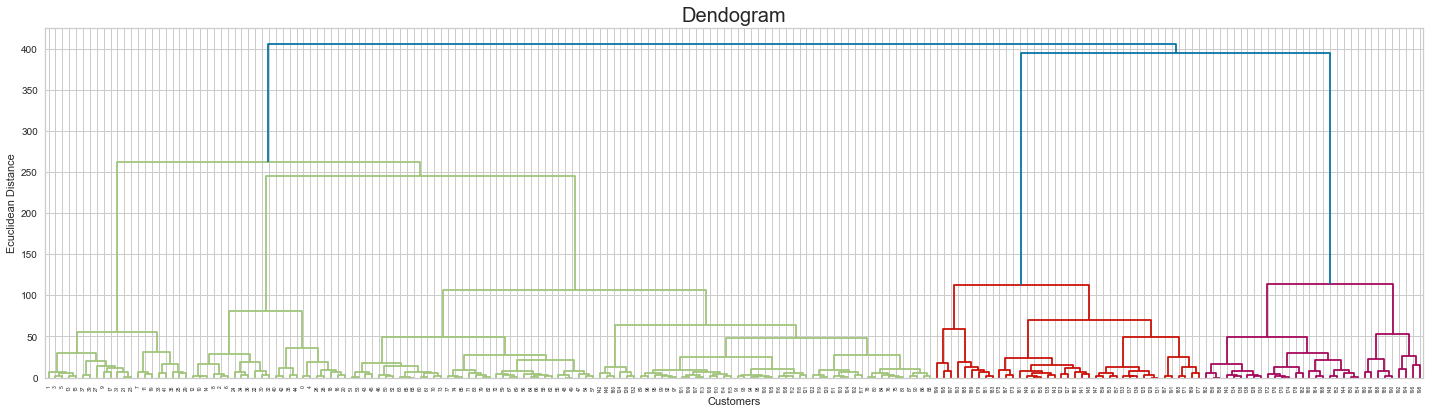

In [30]:
import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize']= (22,6)

# 'ward' is a common agglomerated approach to calculate the distance between two clusters.

dendogram= sch.dendrogram(sch.linkage(x, method= 'ward'))

plt.title("Dendogram", fontsize= 20)
plt.xlabel("Customers")
plt.ylabel("Ecuclidean Distance")
plt.show()

## Agglomerative Clustering

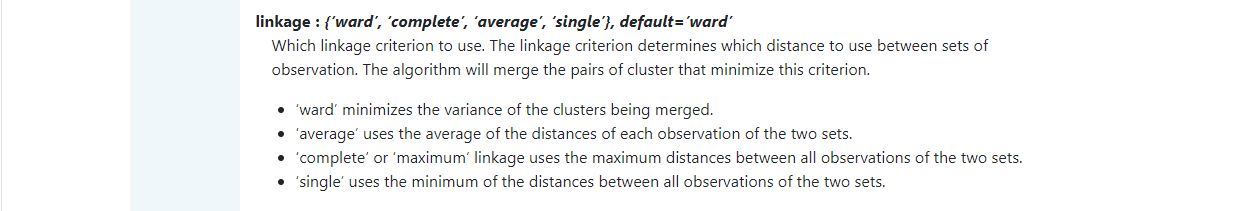

In [31]:
# Visualizing the clusters

from sklearn.cluster import AgglomerativeClustering

hc= AgglomerativeClustering(n_clusters= 5, affinity="euclidean", linkage= 'ward')
y_hc= hc.fit_predict(x)

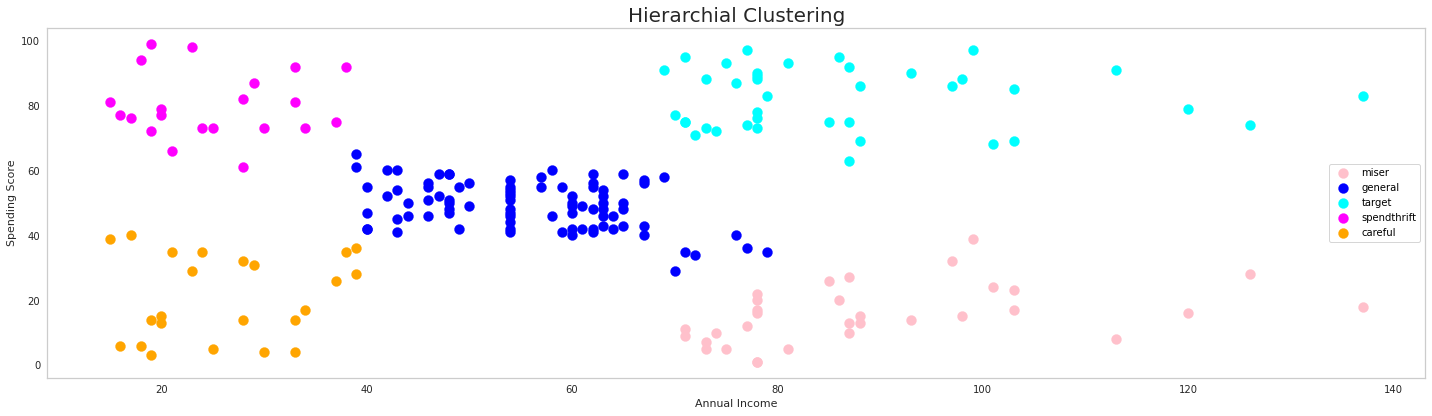

In [32]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')

plt.style.use('default')
plt.rcParams['figure.figsize']= (15,5)
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## DBSCAN clustering

1. Calculate the distance form each point to its closest neighbour using the NearestNeighbors.
2. The point itself is included in n_neighbors.
3. The kneighbors method returns two arrays.
    1. One which contains the distance to the closest n_neighbors points
    2. Other which contains the index for each of those points.

In [33]:
from sklearn.neighbors import NearestNeighbors

neigh= NearestNeighbors(n_neighbors= 2)
nbrs= neigh.fit(x)
distances, indices= nbrs.kneighbors(x)

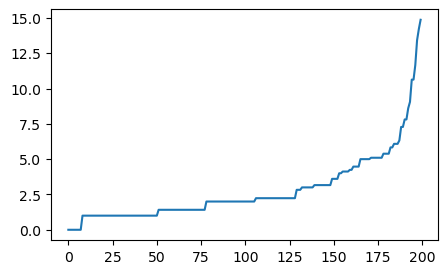

In [34]:
distances= np.sort(distances, axis= 0)
distances= distances[:,1]
plt.rcParams['figure.figsize']= (5,3)
plt.plot(distances)
plt.show()

#### Optimal value of Eps will be the maximum curvature of the curve!

In [35]:
from sklearn.cluster import DBSCAN

dbscan= DBSCAN(eps= 8, min_samples=4)
clusters= dbscan.fit_predict(x)

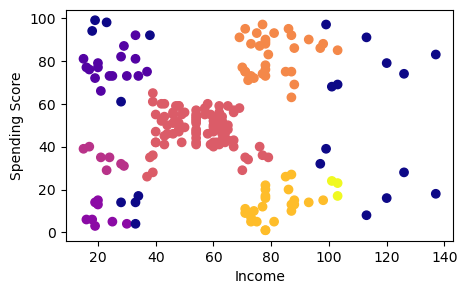

In [36]:
plt.scatter(x[:,0], x[:,1], c=clusters, cmap="plasma")
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()